## Deep Learning for Mortality Prediction (DLMP)

### Import packages 

In [1]:
import tensorflow as tf
import numpy as np
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
tfkl = tf.keras.layers

### Import functions

In [33]:
import dl_functions
import lc_functions
import importlib

importlib.reload(lc_functions)
importlib.reload(dl_functions)

<module 'dl_functions' from '/Users/paigepark/Desktop/deep-mort/code/dl_functions.py'>

### Import data

#### State data

In [3]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')
state_final_test = np.loadtxt('../data/state_final_test.txt')

#### Country data

In [4]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')
country_final_test = np.loadtxt('../data/country_final_test.txt')

#### Combined data

In [5]:
combined_training = np.loadtxt('../data/combined_training.txt')
combined_test = np.loadtxt('../data/combined_test.txt')
combined_final_test = np.loadtxt('../data/combined_final_test.txt')

In [6]:
geos_key = np.load('../data/geos_key.npy')

### Train Seperate DL Models for Country and State Data

#### State Model

In [89]:
# convert data to tensors and other prep 
state_train_prepped = dl_functions.prep_data(state_training, mode="train")
state_test_prepped = dl_functions.prep_data(state_test, mode="test")
state_final_test_prepped = dl_functions.prep_data(state_final_test, mode="test")

In [9]:
# get the proper geography input dimension for model set up 
unique_vals = tf.unique(state_training[:, 0]).y
state_geo_dim = np.array(tf.size(unique_vals)).item()
state_geo_dim

50

In [ ]:
# run model for states
model_state, loss_info_state = dl_functions.run_deep_model(state_train_prepped, state_test_prepped, state_geo_dim, 30)

In [11]:
#model_state.save('models/model_state.keras')

In [97]:
training_input_features = (tf.convert_to_tensor((state_training[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                            tf.convert_to_tensor(state_training[:,3], dtype=tf.float32),  # Age
                            tf.convert_to_tensor(state_training[:,0], dtype=tf.float32),  # Geography
                            tf.convert_to_tensor(state_training[:,1], dtype=tf.float32))  # Gender

In [101]:
test_input_features = (tf.convert_to_tensor((state_test[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(state_test[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(state_test[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(state_test[:,1], dtype=tf.float32))  # Gender

In [99]:
training_predictions = model_state.predict(training_input_features)


14688/14688 ━━━━━━━━━━━━━━━━━━━━ 9s 592us/step


In [100]:
print(state_training.shape)
print(training_input_features[0].shape)
print(training_predictions.shape)

(470000, 5)
(470000,)
(470000, 1)


In [102]:
test_predictions = model_state.predict(test_input_features)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 589us/step


In [103]:
print(inputs.shape)
print(training_predictions.shape)
print(state_training.shape)

(470000, 4)
(470000, 1)
(470000, 5)


In [105]:
inputs = np.delete(state_training, 4, axis=1)
training_predictions = np.column_stack((inputs, training_predictions))

In [106]:
inputs_test = np.delete(state_test, 4, axis=1)
test_predictions = np.column_stack((inputs_test, test_predictions))

In [107]:
print(inputs_test.shape)
print(test_predictions.shape)

(100000, 4)
(100000, 5)


In [108]:
# save
np.savetxt("../data/state_training_predictions.txt", training_predictions)
np.savetxt("../data/state_test_predictions.txt", test_predictions)

#### Single country models

In [57]:
geo_dict = {int(code): geo for geo, code in geos_key}

In [58]:
geo_dict

{0: 'AK',
 1: 'AL',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'FL',
 9: 'GA',
 10: 'HI',
 11: 'ID',
 12: 'IL',
 13: 'IN',
 14: 'IA',
 15: 'KS',
 16: 'KY',
 17: 'LA',
 18: 'ME',
 19: 'MD',
 20: 'MA',
 21: 'MI',
 22: 'MN',
 23: 'MS',
 24: 'MO',
 25: 'MT',
 26: 'NE',
 27: 'NV',
 28: 'NH',
 29: 'NJ',
 30: 'NM',
 31: 'NY',
 32: 'NC',
 33: 'ND',
 34: 'OH',
 35: 'OK',
 36: 'OR',
 37: 'PA',
 38: 'RI',
 39: 'SC',
 40: 'SD',
 41: 'TN',
 42: 'TX',
 43: 'UT',
 44: 'VT',
 45: 'VA',
 46: 'WA',
 47: 'WV',
 48: 'WI',
 49: 'WY',
 50: 'AUS',
 51: 'AUT',
 52: 'BEL',
 53: 'BGR',
 54: 'BLR',
 55: 'CAN',
 56: 'CHE',
 57: 'CZE',
 58: 'DNK',
 59: 'ESP',
 60: 'EST',
 61: 'FIN',
 62: 'FRATNP',
 63: 'GBRTENW',
 64: 'GBR_NIR',
 65: 'GBR_SCO',
 66: 'GRC',
 67: 'HUN',
 68: 'IRL',
 69: 'ISL',
 70: 'ISR',
 71: 'ITA',
 72: 'JPN',
 73: 'LTU',
 74: 'LUX',
 75: 'LVA',
 76: 'NLD',
 77: 'NOR',
 78: 'NZL_NM',
 79: 'POL',
 80: 'PRT',
 81: 'RUS',
 82: 'SVK',
 83: 'SVN',
 84: 'SWE',
 85: 'TWN',
 86: 'UKR'

In [61]:
for i in range(51, 88):
    country_index = i
    one_only_training = combined_training[combined_training[:,0] == country_index]
    one_only_test = combined_test[combined_test[:,0] == country_index]

    single_country_training = one_only_training.copy()
    single_country_training[:, 4] = np.where(np.equal(single_country_training[:, 4], 0), 9e-06, single_country_training[:, 4])
    single_country_training[:, 4] = single_country_training[:, 4]

    single_country_test = one_only_test.copy()
    single_country_test[:, 4] = np.where(np.equal(single_country_test[:, 4], 0), 9e-06, single_country_test[:, 4])
    single_country_test[:, 4] = single_country_test[:, 4]

    single_country_training_prepped = dl_functions.prep_data(single_country_training, mode="train", lograte=True)
    single_country_test_prepped = dl_functions.prep_data(single_country_test, mode="test", lograte=True)
    single_geo_dim = country_index + 1

    print(f"Running model {geo_dict[i]}")
    model_single, loss_single = dl_functions.run_deep_model(single_country_training_prepped, single_country_test_prepped, single_geo_dim, 30, True)

    training_input_features = (tf.convert_to_tensor((single_country_training[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                            tf.convert_to_tensor(single_country_training[:,3], dtype=tf.float32),  # Age
                            tf.convert_to_tensor(single_country_training[:,0], dtype=tf.float32),  # Geography
                            tf.convert_to_tensor(single_country_training[:,1], dtype=tf.float32))  # Gender
    
    test_input_features = (tf.convert_to_tensor((single_country_test[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(single_country_test[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(single_country_test[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(single_country_test[:,1], dtype=tf.float32))  # Gender
    
    training_predictions = model_single.predict(training_input_features)
    test_predictions = model_single.predict(test_input_features)

    inputs = np.delete(single_country_training, 4, axis=1)
    training_predictions = np.column_stack((inputs, training_predictions))
    inputs_test = np.delete(single_country_test, 4, axis=1)
    test_predictions = np.column_stack((inputs_test, test_predictions))

    geo_name = geo_dict[i]

    np.savetxt(f"../data/{geo_name}_training_predictions_log.txt", training_predictions)
    np.savetxt(f"../data/{geo_name}_test_predictions_log.txt", test_predictions)

Running model AUT
Epoch 1/30
1000/1000 - 8s - 8ms/step - loss: 2.4970 - val_loss: 0.0827 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 6s - 6ms/step - loss: 0.2648 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 6s - 6ms/step - loss: 0.1800 - val_loss: 0.0775 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 6s - 6ms/step - loss: 0.1383 - val_loss: 0.0680 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 6s - 6ms/step - loss: 0.1131 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 6s - 6ms/step - loss: 0.0982 - val_loss: 0.0795 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 6s - 6ms/step - loss: 0.0927 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 7s - 7ms/step - loss: 0.0851 - val_loss: 0.0733 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 6s - 6ms/step - loss: 0.0773 - val_loss: 0.0721 - learning_rate: 2.5000e-04
Epoch 10/30
1000/1000 - 7s - 7ms/step - loss: 0.0743 - val_loss: 0.0736 - learning_rate: 2.5000e-04
Epoch 11/30
1000/1000 -

In [47]:
training_input_features = (tf.convert_to_tensor((single_country_training[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                            tf.convert_to_tensor(single_country_training[:,3], dtype=tf.float32),  # Age
                            tf.convert_to_tensor(single_country_training[:,0], dtype=tf.float32),  # Geography
                            tf.convert_to_tensor(single_country_training[:,1], dtype=tf.float32))  # Gender

In [48]:
test_input_features = (tf.convert_to_tensor((single_country_test[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(single_country_test[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(single_country_test[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(single_country_test[:,1], dtype=tf.float32))  # Gender

In [49]:
training_predictions = model_single.predict(training_input_features)


294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


In [51]:
print(training_predictions[0:200])

[[-3.8030753]
 [-3.4812484]
 [-6.4278517]
 [-6.2944837]
 [-6.958761 ]
 [-6.7652974]
 [-7.236673 ]
 [-7.0278873]
 [-7.42921  ]
 [-7.2260623]
 [-7.554958 ]
 [-7.340595 ]
 [-7.730075 ]
 [-7.419843 ]
 [-7.8488145]
 [-7.507641 ]
 [-7.9582934]
 [-7.5577855]
 [-8.044639 ]
 [-7.613158 ]
 [-8.1122675]
 [-7.636172 ]
 [-8.081564 ]
 [-7.6029105]
 [-8.039232 ]
 [-7.5184226]
 [-8.006192 ]
 [-7.381913 ]
 [-7.9154835]
 [-7.233257 ]
 [-7.747707 ]
 [-7.0498066]
 [-7.599899 ]
 [-6.7950816]
 [-7.501678 ]
 [-6.6445107]
 [-7.3838325]
 [-6.463406 ]
 [-7.342363 ]
 [-6.367494 ]
 [-7.3291106]
 [-6.3377213]
 [-7.27881  ]
 [-6.253528 ]
 [-7.2640176]
 [-6.2633743]
 [-7.2724233]
 [-6.305958 ]
 [-7.2141805]
 [-6.343819 ]
 [-7.136926 ]
 [-6.3344984]
 [-7.0966554]
 [-6.3529277]
 [-7.0925198]
 [-6.364377 ]
 [-7.018763 ]
 [-6.3420434]
 [-6.940712 ]
 [-6.3400235]
 [-6.87361  ]
 [-6.3149257]
 [-6.7872634]
 [-6.2518945]
 [-6.7009478]
 [-6.209076 ]
 [-6.6284766]
 [-6.146615 ]
 [-6.556044 ]
 [-6.09294  ]
 [-6.4858446]
 [-6.0

In [52]:
test_predictions = model_single.predict(test_input_features)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


In [55]:
test_input_features

(<tf.Tensor: shape=(2000,), dtype=float32, numpy=
 array([0.78333336, 0.78333336, 0.78333336, ..., 0.93333334, 0.93333334,
        0.93333334], dtype=float32)>,
 <tf.Tensor: shape=(2000,), dtype=float32, numpy=array([ 0.,  0.,  1., ..., 98., 99., 99.], dtype=float32)>,
 <tf.Tensor: shape=(2000,), dtype=float32, numpy=array([87., 87., 87., ..., 87., 87., 87.], dtype=float32)>,
 <tf.Tensor: shape=(2000,), dtype=float32, numpy=array([0., 1., 0., ..., 1., 0., 1.], dtype=float32)>)

In [53]:
print(test_predictions)

[[-5.0776734 ]
 [-4.8678837 ]
 [-7.8528275 ]
 ...
 [-0.89078134]
 [-1.0419693 ]
 [-0.8356581 ]]


In [54]:
inputs = np.delete(single_country_training, 4, axis=1)
training_predictions = np.column_stack((inputs, training_predictions))
inputs_test = np.delete(single_country_test, 4, axis=1)
test_predictions = np.column_stack((inputs_test, test_predictions))

In [157]:
training_predictions

array([[ 6.10000000e+01,  0.00000000e+00,  1.95900000e+03,
         0.00000000e+00, -1.16084642e+01],
       [ 6.10000000e+01,  1.00000000e+00,  1.95900000e+03,
         0.00000000e+00, -1.16079035e+01],
       [ 6.10000000e+01,  0.00000000e+00,  1.95900000e+03,
         1.00000000e+00, -1.16102400e+01],
       ...,
       [ 6.10000000e+01,  1.00000000e+00,  2.00500000e+03,
         9.80000000e+01, -1.16115503e+01],
       [ 6.10000000e+01,  0.00000000e+00,  2.00500000e+03,
         9.90000000e+01, -1.16129408e+01],
       [ 6.10000000e+01,  1.00000000e+00,  2.00500000e+03,
         9.90000000e+01, -1.16123838e+01]])

In [156]:
# save
# np.savetxt("../data/us_training_predictions.txt", training_predictions)
# np.savetxt("../data/us_test_predictions.txt", test_predictions)

np.savetxt("../data/fin_training_predictions_log.txt", training_predictions)
np.savetxt("../data/fin_test_predictions_log.txt", test_predictions)

#### Country Model

In [21]:
norm_country_training = country_training.copy()
norm_country_training[:, 4] = np.where(np.equal(norm_country_training[:, 4], 0), 1e-5, norm_country_training[:, 4])
norm_country_training[:, 4] = np.log(norm_country_training[:, 4])
print(norm_country_training)
min_val = np.min(norm_country_training[:,4])
max_val = np.max(norm_country_training[:,4])

print(min_val)
print(max_val)
# Apply min-max normalization.
norm_country_training[:,4] = (norm_country_training[:,4] - min_val) / (max_val - min_val)

norm_country_test = country_test.copy()
norm_country_test[:, 4] = np.where(np.equal(norm_country_test[:, 4], 0), 1e-5, norm_country_test[:, 4])
norm_country_test[:, 4] = np.log(norm_country_test[:, 4])
norm_country_test[:,4] = (norm_country_test[:, 4] - min_val) / (max_val - min_val)

[[ 5.00000000e+01  0.00000000e+00  1.95900000e+03  0.00000000e+00
  -3.94718397e+00]
 [ 5.00000000e+01  1.00000000e+00  1.95900000e+03  0.00000000e+00
  -3.70610700e+00]
 [ 5.00000000e+01  0.00000000e+00  1.95900000e+03  1.00000000e+00
  -6.36834220e+00]
 ...
 [ 8.70000000e+01  1.00000000e+00  2.00500000e+03  9.80000000e+01
  -8.89697488e-01]
 [ 8.70000000e+01  0.00000000e+00  2.00500000e+03  9.90000000e+01
  -9.79590021e-01]
 [ 8.70000000e+01  1.00000000e+00  2.00500000e+03  9.90000000e+01
  -8.25371999e-01]]
-11.618285980628055
0.0


In [22]:
print(np.min(country_training[:,4]))
print(np.max(country_training[:,4]))
print(np.min(country_test[:,4]))
print(np.max(country_test[:,4]))
print(np.log(1e-5))


0.0
1.0
0.0
1.0
-11.512925464970229


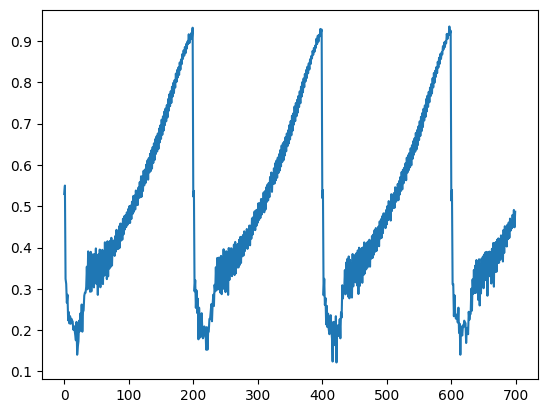

In [24]:
plt.plot(norm_country_test[0:700,4])

In [30]:
# prep data
country_train_prepped = dl_functions.prep_data(country_training, mode="train")
country_test_prepped = dl_functions.prep_data(country_test, mode="test")
#country_final_test_prepped = dl_functions.prep_data(country_final_test, mode="test")

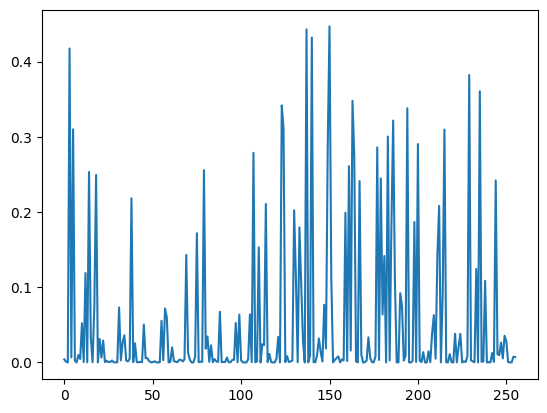

In [379]:
plt.plot(next(iter(country_test_prepped))[1])

In [26]:
# get the proper geography input dimension for model set up 
unique_vals = tf.unique(country_training[:, 0]).y
country_geo_dim = np.array(tf.size(unique_vals)).item()
country_geo_dim = country_geo_dim + 50
country_geo_dim

88

In [31]:
# run country model
model_country, loss_info_country = dl_functions.run_deep_model(country_train_prepped, country_test_prepped, country_geo_dim, 30)

Epoch 1/30
1000/1000 - 7s - 7ms/step - loss: 0.0630 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 6s - 6ms/step - loss: 0.0028 - val_loss: 7.1917e-04 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 7s - 7ms/step - loss: 0.0015 - val_loss: 7.4755e-04 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 7s - 7ms/step - loss: 0.0013 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 7s - 7ms/step - loss: 0.0012 - val_loss: 4.4420e-04 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 6s - 6ms/step - loss: 0.0011 - val_loss: 7.0403e-04 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 7s - 7ms/step - loss: 0.0010 - val_loss: 4.9126e-04 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 6s - 6ms/step - loss: 9.6987e-04 - val_loss: 3.7958e-04 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 7s - 7ms/step - loss: 9.0175e-04 - val_loss: 2.5511e-04 - learning_rate: 0.0010
Epoch 10/30
1000/1000 - 7s - 7ms/step - loss: 8.5923e-04 - val_loss: 5.4326e-04 - learning_rate: 0.0010
Epoch

In [64]:
#model_country.save('models/model_country.keras')
model_country.save('models/model_country_log.keras')

In [32]:
training_input_features = (tf.convert_to_tensor((country_training[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                            tf.convert_to_tensor(country_training[:,3], dtype=tf.float32),  # Age
                            tf.convert_to_tensor(country_training[:,0], dtype=tf.float32),  # Geography
                            tf.convert_to_tensor(country_training[:,1], dtype=tf.float32))  # Gender

In [33]:
test_input_features = (tf.convert_to_tensor((country_test[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(country_test[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(country_test[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(country_test[:,1], dtype=tf.float32))  # Gender

In [34]:
training_predictions = model_country.predict(training_input_features)
# training_predictions = np.exp(training_predictions_raw * (max_val - min_val) + min_val)

10650/10650 ━━━━━━━━━━━━━━━━━━━━ 6s 522us/step


In [35]:
test_predictions = model_country.predict(test_input_features)
#test_predictions = np.exp(test_predictions_raw * (max_val - min_val) + min_val)

2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step


In [36]:
inputs = np.delete(country_training, 4, axis=1)
training_predictions = np.column_stack((inputs, training_predictions))
inputs_test = np.delete(country_test, 4, axis=1)
test_predictions = np.column_stack((inputs_test, test_predictions))

In [37]:
# save
np.savetxt("../data/country_training_predictions.txt", training_predictions)
np.savetxt("../data/country_test_predictions.txt", test_predictions)

# np.savetxt("../data/country_training_predictions_log.txt", training_predictions)
# np.savetxt("../data/country_test_predictions_log.txt", test_predictions)

### Train Combined DL Model

In [47]:
# convert combined data to tensors and other prep
combined_train_prepped = dl_functions.prep_data(combined_training, mode="train")
combined_test_prepped = dl_functions.prep_data(combined_test, mode="test")
combined_final_test_prepped = dl_functions.prep_data(combined_final_test, mode="test")

In [48]:
# get the proper geography input dimension for model set up 
unique_vals = tf.unique(combined_training[:, 0]).y
combined_geo_dim = np.array(tf.size(unique_vals)).item()
print(combined_geo_dim)

88


In [49]:
model_combined, loss_info_combined = dl_functions.run_deep_model(combined_train_prepped, combined_test_prepped, combined_geo_dim, 30)

Epoch 1/30
1000/1000 - 9s - 9ms/step - loss: 2.7991 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 8s - 8ms/step - loss: 0.5493 - val_loss: 0.5930 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 7s - 7ms/step - loss: 0.4590 - val_loss: 0.4537 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 6s - 6ms/step - loss: 0.4152 - val_loss: 0.4447 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 6s - 6ms/step - loss: 0.3813 - val_loss: 0.5314 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 6s - 6ms/step - loss: 0.3740 - val_loss: 0.4934 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 6s - 6ms/step - loss: 0.3545 - val_loss: 0.4615 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 6s - 6ms/step - loss: 0.3481 - val_loss: 0.4443 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 6s - 6ms/step - loss: 0.3447 - val_loss: 0.5052 - learning_rate: 0.0010
Epoch 10/30
1000/1000 - 5s - 5ms/step - loss: 0.3441 - val_loss: 0.3947 - learning_rate: 0.0010
Epoch 11/30
1000/1000 - 6s - 6ms/step - loss: 0.3

In [50]:
#model_combined.save('models/model_combined.keras')
model_combined.save('models/model_combined_log.keras')

In [51]:
training_input_features = (tf.convert_to_tensor((combined_training[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                            tf.convert_to_tensor(combined_training[:,3], dtype=tf.float32),  # Age
                            tf.convert_to_tensor(combined_training[:,0], dtype=tf.float32),  # Geography
                            tf.convert_to_tensor(combined_training[:,1], dtype=tf.float32))  # Gender

In [ ]:
print(training_input_features)

(<tf.Tensor: shape=(470000,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.76666665, 0.76666665,
       0.76666665], dtype=float32)>, <tf.Tensor: shape=(470000,), dtype=float32, numpy=array([ 0.,  1.,  2., ..., 97., 98., 99.], dtype=float32)>, <tf.Tensor: shape=(470000,), dtype=float32, numpy=array([ 0.,  0.,  0., ..., 49., 49., 49.], dtype=float32)>, <tf.Tensor: shape=(470000,), dtype=float32, numpy=array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)>)


In [52]:
test_input_features = (tf.convert_to_tensor((combined_test[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(combined_test[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(combined_test[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(combined_test[:,1], dtype=tf.float32))  # Gender

In [53]:
training_predictions = np.exp(model_combined.predict(training_input_features))


25338/25338 ━━━━━━━━━━━━━━━━━━━━ 15s 578us/step


In [57]:
test_predictions = np.exp(model_combined.predict(test_input_features))

5438/5438 ━━━━━━━━━━━━━━━━━━━━ 3s 599us/step


In [58]:
inputs = np.delete(combined_training, 4, axis=1)
training_predictions = np.column_stack((inputs, training_predictions))

In [59]:
inputs_test = np.delete(combined_test, 4, axis=1)
test_predictions = np.column_stack((inputs_test, test_predictions))

In [60]:
# # save
# np.savetxt("../data/combined_training_predictions.txt", training_predictions)
# np.savetxt("../data/combined_test_predictions.txt", test_predictions)

np.savetxt("../data/combined_training_predictions_log.txt", training_predictions)
np.savetxt("../data/combined_test_predictions_log.txt", test_predictions)

### Train log mortality models (countries)

In [98]:
import dl_functions
import lc_functions
import importlib

importlib.reload(lc_functions)
importlib.reload(dl_functions)

<module 'dl_functions' from '/Users/paigepark/Desktop/deep-mort/code/dl_functions.py'>

In [99]:
# prep data
country_train_prepped_log = dl_functions.prep_data(country_training, mode="train", lograte=True)
country_test_prepped_log = dl_functions.prep_data(country_test, mode="test", lograte=True)
#country_final_test_prepped = dl_functions.prep_data(country_final_test, mode="test")

In [100]:
# run country model
model_country_log, loss_info_country_log = dl_functions.run_deep_model(country_train_prepped_log, country_test_prepped_log, country_geo_dim, 30, True)

Epoch 1/30
1000/1000 - 7s - 7ms/step - loss: 0.8338 - val_loss: 0.2888 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 6s - 6ms/step - loss: 0.1932 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 6s - 6ms/step - loss: 0.1820 - val_loss: 0.2379 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 6s - 6ms/step - loss: 0.1667 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 5s - 5ms/step - loss: 0.1687 - val_loss: 0.2300 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 5s - 5ms/step - loss: 0.1624 - val_loss: 0.1819 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 5s - 5ms/step - loss: 0.1593 - val_loss: 0.1662 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 6s - 6ms/step - loss: 0.1590 - val_loss: 0.1760 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 6s - 6ms/step - loss: 0.1513 - val_loss: 0.1644 - learning_rate: 0.0010
Epoch 10/30
1000/1000 - 5s - 5ms/step - loss: 0.1589 - val_loss: 0.2089 - learning_rate: 0.0010
Epoch 11/30
1000/1000 - 7s - 7ms/step - loss: 0.1

In [102]:
mini_features, mini_data = next(iter(country_test_prepped_log))

In [103]:
mini_pred = model_country_log.predict(mini_features)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


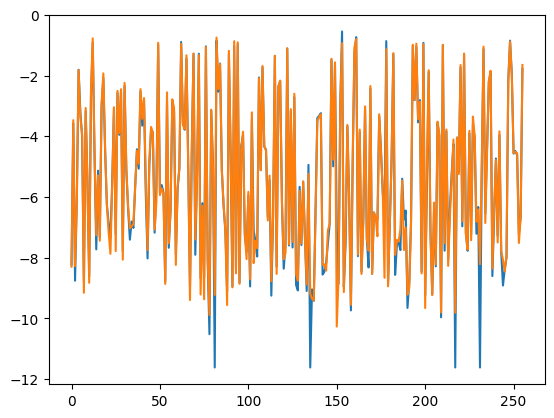

In [104]:
plt.plot(mini_data[::1])
plt.plot(mini_pred[::1])

In [88]:
mse = np.mean((mini_pred - mini_data)**2)
print(mse)

0.028795267


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


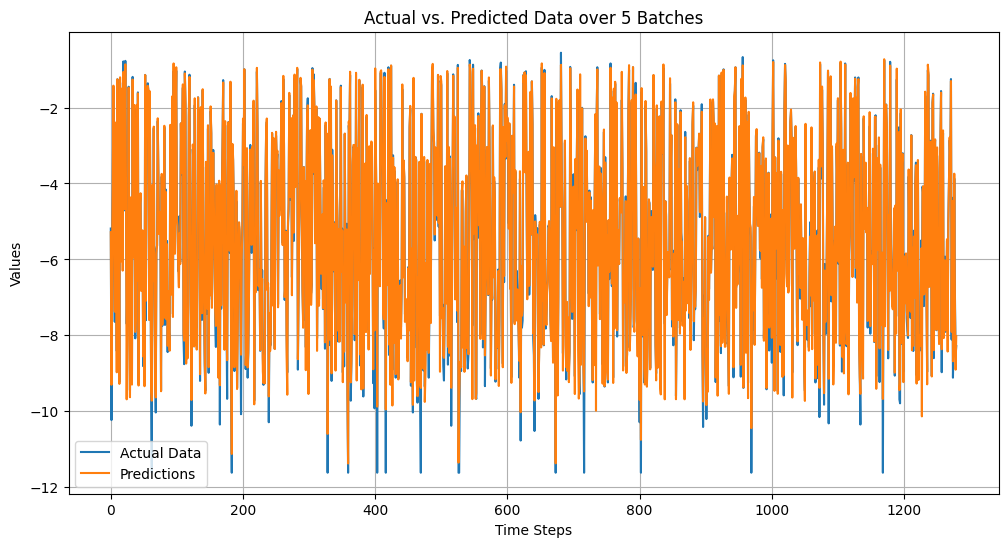

Mean Squared Error (MSE): 0.1193


In [112]:
num_batches_to_plot = 5 # specify how many batches you want to plot

# Initialize lists to collect data
all_predictions = []
all_actual_data = []

# Iterate through batches
for i, (features, data) in enumerate(country_test_prepped_log):
    if i >= num_batches_to_plot:
        break  # stop after reaching desired number of batches
    
    # Predict using the model
    pred = model_country_log.predict(features)
    
    # Append predictions and actual data to lists
    all_predictions.append(pred)
    all_actual_data.append(data)

# Concatenate batches into single arrays
all_predictions = np.concatenate(all_predictions)
all_actual_data = np.concatenate(all_actual_data)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(all_actual_data, label="Actual Data")
plt.plot(all_predictions, label="Predictions")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title(f"Actual vs. Predicted Data over {num_batches_to_plot} Batches")
plt.grid(True)
plt.show()

# Compute MSE over all batches
mse = np.mean((all_predictions - all_actual_data)**2)
print(f"Mean Squared Error (MSE): {mse:.4f}")


In [105]:
#model_country.save('models/model_country.keras')
model_country.save('models/model_country_log_new.keras')

In [106]:
training_input_features = (tf.convert_to_tensor((country_training[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                            tf.convert_to_tensor(country_training[:,3], dtype=tf.float32),  # Age
                            tf.convert_to_tensor(country_training[:,0], dtype=tf.float32),  # Geography
                            tf.convert_to_tensor(country_training[:,1], dtype=tf.float32))  # Gender

In [107]:
test_input_features = (tf.convert_to_tensor((country_test[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(country_test[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(country_test[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(country_test[:,1], dtype=tf.float32))  # Gender

In [108]:
training_predictions = model_country_log.predict(training_input_features)
# training_predictions = np.exp(training_predictions_raw * (max_val - min_val) + min_val)

10650/10650 ━━━━━━━━━━━━━━━━━━━━ 7s 673us/step


In [109]:
test_predictions = model_country_log.predict(test_input_features)
#test_predictions = np.exp(test_predictions_raw * (max_val - min_val) + min_val)

2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step


In [110]:
inputs = np.delete(country_training, 4, axis=1)
training_predictions = np.column_stack((inputs, training_predictions))
inputs_test = np.delete(country_test, 4, axis=1)
test_predictions = np.column_stack((inputs_test, test_predictions))

In [111]:
# save
np.savetxt("../data/country_training_predictions_log_new.txt", training_predictions)
np.savetxt("../data/country_test_predictions_log_new.txt", test_predictions)

# np.savetxt("../data/country_training_predictions_log.txt", training_predictions)
# np.savetxt("../data/country_test_predictions_log.txt", test_predictions)

### Generate Table 1: Training and Test MSEs
This table will document average MSEs (for states alone, countries alone, and total) over 5 training runs with each model (LC, deep learning seperate, deep learning joint)

Comparison results are computationally costly to generate. Could be good to look into how Savio could help to speed this up. Commenting out for now.

In [ ]:
# def compare_models(num_iterations):
#     results = []
#     for i in range(num_iterations):
#         lc = lc_functions.run_lc_model(train_data=combined_training, test_data=combined_test)
#         print(f"Lee Carter Iteration {i} Complete")

#         state_model, state_only = dl_functions.run_deep_model(dataset_train=state_train_prepped, dataset_test=state_test_prepped, geo_dim=state_geo_dim, epochs=30)
#         country_model, country_only = dl_functions.run_deep_model(dataset_train=country_train_prepped, dataset_test=country_test_prepped, geo_dim=country_geo_dim, epochs=30)

#         ind_ave = ((state_only['val_mse']*50) + (country_only['val_mse']*37)) / 87
#         seperate_dl = [state_only['val_mse'], country_only['val_mse'], ind_ave]
#         print(f"Seperate DL Iteration {i} Complete")

#         model_combined, loss_info_combined = dl_functions.run_deep_model(combined_train_prepped, combined_test_prepped, combined_geo_dim, epochs=30)

#         state_combined = model_combined.evaluate(state_test_prepped)
#         country_combined = model_combined.evaluate(country_test_prepped)
#         total_combined = model_combined.evaluate(combined_test_prepped)

#         combined_dl = [state_combined, country_combined, total_combined]
#         print(f"Combined DL Iteration {i} Complete")

#         results.append((lc, seperate_dl, combined_dl))

#     return results
        

In [27]:
# comparison_results = compare_models(num_iterations=1)

In [28]:
# lc_results = np.array([result[0][0] for result in comparison_results])
# seperate_dl_results = np.array([result[1] for result in comparison_results])
# combined_dl_results = np.array([result[2] for result in comparison_results])

In [29]:
# lc_avg = np.mean(lc_results, axis=0)
# seperate_dl_avg = np.mean(seperate_dl_results, axis=0)
# combined_dl_avg = np.mean(combined_dl_results, axis=0)

In [30]:
# average_results = np.array([lc_avg, seperate_dl_avg, combined_dl_avg])

# # Multiply each value by 10^4 for table clarity
# average_results = [[value * 10**4 for value in row] for row in average_results]
# average_results_rounded = np.round(average_results, 3).T
# print(average_results_rounded)

In [31]:
# from tabulate import tabulate

# column_labels = ["Lee Carter Model", "Separate DL Models", "Combined DL Model"]
# row_labels = ["State Test MSE", "Country Test MSE", "Weighted Average of MSEs"]

# table_data = [[row_labels[i]] + list(average_results_rounded[i]) for i in range(len(row_labels))]

# latex_table = tabulate(table_data, headers=["Test MSE by Model"] + column_labels, tablefmt="latex")


In [32]:
# print(latex_table)